# Molécula $H_2$

In [25]:
# Importación de las librerías
#---
from pylab import * # Librerías numpy,scipy y matplotlib
import pyscf        # Librería pyscf
from pyscf import scf

# Geometría de la molécula diatómica ${\rm H}_2$

|Átomo| X[Å] | Y[Å] | Z[Å] |
|-|-|-|-|
H|0.0000|0.0000|0.0000|
H|0.0000|0.0000|0.7414|


In [26]:
# Definición de la clase mole (molecule)
# útil para manipular los parámetros 
# y atributos de las integrales GTO.
H2 = pyscf.gto.Mole(atom = """
    H 0.0000  0.0000 0.0000
    H 0.0000  0.0000 0.7414 
    """,basis = "STO-3G")
# ¿Qué significa base STO-3G?

# Define la molécula con la geometría 
# y ahora puede calcularse la Energía
H2 = H2.build()

In [27]:
# Define el método de cálculo con la geometría
rhf = scf.RHF(H2)
# ¿Qué significa RHF?
# Restricted Hartree Fock

# Ejecuta el método definido y regresa la 
# Energía convergida.
rhf.kernel(print=False)

# Las unidades de la energia son Hartree
# 1 Hartree = 27.211 eV

# Los Hartree son las unidades atomicas de la energia

converged SCF energy = -1.11668438708534


-1.1166843870853405

# Variación de la geometría

In [28]:
d = 3.0 # angstroms
H2 = pyscf.gto.Mole(atom = """
    H 0.0000  0.0000 0.0000
    H 0.0000  0.0000 {0:.4f} 
    """.format(d),basis = "STO-3G")
H2  = H2.build()
rhf = scf.RHF(H2)
rhf.kernel()

converged SCF energy = -0.656048251145591


-0.656048251145591

# Función que devuelve la energía


In [29]:
def SCFenergia(d=0.7414):
  H2 = pyscf.gto.Mole(atom = """
      H 0.0000  0.0000 0.0000
      H 0.0000  0.0000 {0:.4f} 
      """.format(d),basis = "STO-3G")
  H2  = H2.build()
  rhf = scf.RHF(H2)
  rhf.verbose = 0 
  SCFe = rhf.kernel()
  return SCFe

In [30]:
# Separación entre átomos de H
d = linspace(0.4,3.0,301) # angstroms

In [31]:
# Evaluación de la Energía
E = list( map(SCFenergia,d))

Text(0, 0.5, 'E [Ha]')

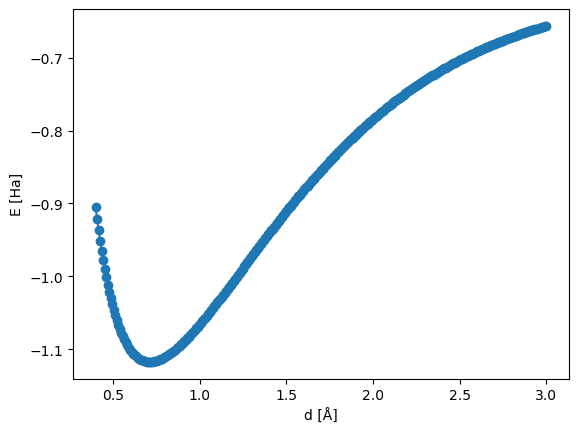

In [32]:
plot(d,E,'o-')
xlabel('d [Å]')
ylabel('E [Ha]')